In [59]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew



from scipy.stats.mstats import winsorize


In [ ]:

# Cargar el dataset de Diabetes
df = pd.read_csv("Cars export 2025-02-05 19-38-54.csv")



# Seleccionar variables independientes (X) y la variable objetivo (y)
X = df.drop(columns=["price","mileage","tax","mpg"])  # Variables predictoras
y = df["price"]  # Variable objetivo
X = pd.get_dummies(X, drop_first=True)  # Convierte categóricas en numéricas

X["engineSize_log"] =np.log1p(X["engineSize"])
print("SKEWWW engineSize",skew(X["engineSize_log"]))


X["win_year"]  =winsorize(X["year"],limits=[0.05,0.05])
print("SKEWWW year ",skew(X["win_year"]))

# Comprobamos el rango de valores de la variable objetivo
print(f"Valor mínimo de price: {y.min()}")
print(f"Valor máximo de price: {y.max()}")

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy 

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["price"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["price"].sort_values(ascending=False)

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)


# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Intercepto:", modelo.intercept_, "\n")
print(f"Correlacion: {correlaciones},  \n")
print(f"VIF: {vif_data}, \n")
print("Coeficientes del modelo:")
print(coeficientes, "\n")

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

SKEWWW engineSize 0.23795914282124506
SKEWWW year  -0.6800077777800619
Valor mínimo de price: 450
Valor máximo de price: 159999
Intercepto: 16784.04760029131 

Correlacion: price                    1.000000
engineSize               0.639356
engineSize_log           0.605464
win_year                 0.509091
year                     0.509091
                           ...   
model_ Fiesta           -0.178197
Manufacturer_ford       -0.215470
fuelType_Petrol         -0.229729
Manufacturer_vauxhall   -0.259333
transmission_Manual     -0.545763
Name: price, Length: 214, dtype: float64,  

VIF:                     Variable           VIF
0                       year  4.789540e+06
1                 engineSize  4.913534e+01
2            model_ 2 Series  1.595215e+00
3            model_ 3 Series  2.225656e+00
4            model_ 4 Series  1.514014e+00
..                       ...           ...
208      Manufacturer_toyota  1.234695e+07
209    Manufacturer_vauxhall  3.738675e+06
210  Manufacture

In [61]:
""" # Cargar el dataset de Diabetes
df = pd.read_csv("Cars export 2025-02-05 19-38-54.csv")



# Seleccionar variables independientes (X) y la variable objetivo (y)
X = df.drop(columns=["price","model","transmission","fuelType","Manufacturer"])  # Variables predictoras
y = df["price"]  # Variable objetivo

X["engineSize_log"] =np.log1p(X["engineSize"])
print("SKEWWW engineSize",skew(X["engineSize_log"]))


X["win_year"]  =winsorize(X["year"],limits=[0.05,0.05])
print("SKEWWW year ",skew(X["win_year"]))

# Comprobamos el rango de valores de la variable objetivo
print(f"Valor mínimo de price: {y.min()}")
print(f"Valor máximo de price: {y.max()}")

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy 

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["price"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["price"].sort_values(ascending=False)

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)


# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Intercepto:", modelo.intercept_, "\n")
print(f"Correlacion: {correlaciones},  \n")
print(f"VIF: {vif_data}, \n")
print("Coeficientes del modelo:")
print(coeficientes, "\n")

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}") """

' # Cargar el dataset de Diabetes\ndf = pd.read_csv("Cars export 2025-02-05 19-38-54.csv")\n\n\n\n# Seleccionar variables independientes (X) y la variable objetivo (y)\nX = df.drop(columns=["price","model","transmission","fuelType","Manufacturer"])  # Variables predictoras\ny = df["price"]  # Variable objetivo\n\nX["engineSize_log"] =np.log1p(X["engineSize"])\nprint("SKEWWW engineSize",skew(X["engineSize_log"]))\n\n\nX["win_year"]  =winsorize(X["year"],limits=[0.05,0.05])\nprint("SKEWWW year ",skew(X["win_year"]))\n\n# Comprobamos el rango de valores de la variable objetivo\nprint(f"Valor mínimo de price: {y.min()}")\nprint(f"Valor máximo de price: {y.max()}")\n\n# Escalar las variables independientes con StandardScaler()\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X) # Devuelve un array NumPy \n\n# Calcular la correlación con la variable objetivo\ndf_scaled = pd.DataFrame(X_scaled, columns=X.columns) \ndf_scaled["price"] = y  # Agregamos la variable objetivo para calcu

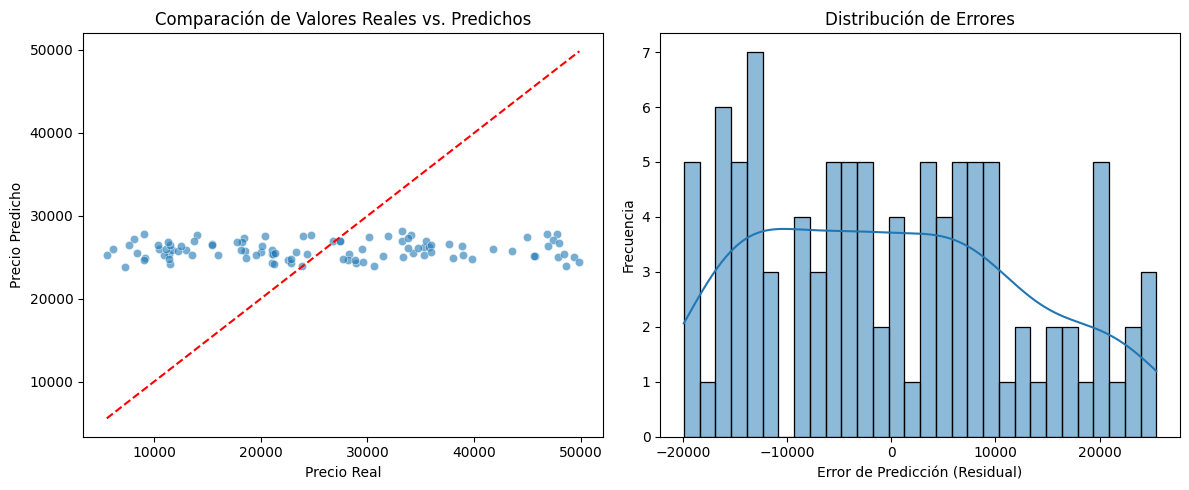

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Simulación de datos
np.random.seed(42)
n_samples = 500
data = {
    "year": np.random.randint(2000, 2025, n_samples),
    "mileage": np.random.randint(10000, 200000, n_samples),
    "tax": np.random.randint(0, 500, n_samples),
    "mpg": np.random.uniform(20, 60, n_samples),
    "engineSize": np.random.uniform(1.0, 5.0, n_samples),
    "price": np.random.randint(5000, 50000, n_samples)
}
df = pd.DataFrame(data)

# Seleccionar variables
X = df.drop(columns=["price"])
y = df["price"]

# Transformaciones
X["engineSize_log"] = np.log1p(X["engineSize"])
X["win_year"] = winsorize(X["year"], limits=[0.05, 0.05])
X.drop(columns=["engineSize", "year"], inplace=True)  # Eliminamos las originales

# Escalar las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Visualización
plt.figure(figsize=(12, 5))

# Gráfico de dispersión valores reales vs predichos
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación de Valores Reales vs. Predichos")

# Histograma de errores
plt.subplot(1, 2, 2)
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel("Error de Predicción (Residual)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Errores")

plt.tight_layout()
plt.show()

In [65]:

# Cargar el dataset de Diabetes
df = pd.read_csv("Cars export 2025-02-05 19-38-54.csv")



# Seleccionar variables independientes (X) y la variable objetivo (y)
X = df.drop(columns=["price","mileage","tax","mpg"])  # Variables predictoras
y = df["price"]  # Variable objetivo
X = pd.get_dummies(X, drop_first=True)  # Convierte categóricas en numéricas

X["engineSize_log"] =np.log1p(X["engineSize"])
print("SKEWWW engineSize",skew(X["engineSize_log"]))


X["win_year"]  =winsorize(X["year"],limits=[0.05,0.05])
print("SKEWWW year ",skew(X["win_year"]))

# Comprobamos el rango de valores de la variable objetivo
print(f"Valor mínimo de price: {y.min()}")
print(f"Valor máximo de price: {y.max()}")

# Escalar las variables independientes con StandardScaler()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Devuelve un array NumPy 

# Calcular la correlación con la variable objetivo
df_scaled = pd.DataFrame(X_scaled, columns=X.columns) 
df_scaled["price"] = y  # Agregamos la variable objetivo para calcular correlación
correlaciones = df_scaled.corr()["price"].sort_values(ascending=False)

# Calcular el VIF para detectar colinealidad entre variables
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# Dividir el dataset en entrenamiento (80%) y prueba (20%) con train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# Entrenar el modelo de Regresión Lineal con LinearRegression()
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Obtener e interpretar los coeficientes y el intercepto del modelo
coeficientes = pd.Series(modelo.coef_, index=X.columns)


# Realizar predicciones con modelo.predict(X_test)
y_pred = modelo.predict(X_test)

# Evaluar el modelo 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Intercepto:", modelo.intercept_, "\n")
print(f"Correlacion: {correlaciones},  \n")
print(f"VIF: {vif_data}, \n")
print("Coeficientes del modelo:")
print(coeficientes, "\n")

# Mostrar resultados
print(f"MAE (Error Absoluto Medio): {mae:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"R² (Coeficiente de Determinación): {r2:.4f}")

SKEWWW engineSize 0.23795914282124506
SKEWWW year  -0.6800077777800619
Valor mínimo de price: 450
Valor máximo de price: 159999
Intercepto: 16777.240837638274 

Correlacion: price                    1.000000
engineSize               0.639356
engineSize_log           0.605464
win_year                 0.509091
year                     0.509091
                           ...   
model_ Fiesta           -0.178197
Manufacturer_ford       -0.215470
fuelType_Petrol         -0.229729
Manufacturer_vauxhall   -0.259333
transmission_Manual     -0.545763
Name: price, Length: 214, dtype: float64,  

VIF:                     Variable           VIF
0                       year  4.789540e+06
1                 engineSize  4.913534e+01
2            model_ 2 Series  1.595215e+00
3            model_ 3 Series  2.225656e+00
4            model_ 4 Series  1.514014e+00
..                       ...           ...
208      Manufacturer_toyota  1.234695e+07
209    Manufacturer_vauxhall  3.738675e+06
210  Manufactur